# MET DATA ANALYSIS
#### Reid Holben and Gabriel Barela

#### Loading the dataset from GitHub using pandas.
* Imports the pandas library: 
    * This is essential for data manipulation and analysis in Python.
* Defines the URL: 
    * This is the link to the raw dataset hosted on GitHub.
* Loads the dataset: 
    * The pd.read_csv(url) function reads the CSV file from the provided URL and loads it into a pandas DataFrame called data.

In [1]:
! pip install -r requirements.txt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# URL of the raw dataset on GitHub
url = 'https://github.com/metmuseum/openaccess/raw/refs/heads/master/MetObjects.csv'

# Load the dataset
data = pd.read_csv(url)

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/3434168544.py:11: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


#### Analyze missing data in the DataFrame and combine it with the data types of each feature.
1. Calculate Missing Data:
* nullCounts = data.isnull().sum(): Counts the number of missing values for each feature.
* totalInstances = len(data): Gets the total number of instances in the DataFrame.
* nullPercentages = (nullCounts / totalInstances) * 100: Calculates the percentage of missing values for each feature.
2. Create a List of Tuples:
* A loop iterates over the features, counts, and percentages, appending them to nullData as tuples.
3. Create a DataFrame for Missing Data:
* nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage']): Converts the list of tuples into a DataFrame.
* nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False): Sorts the DataFrame by the percentage of missing values in descending order.
4. Get Data Types:
* data_types = data.dtypes: Gets the data types of each feature.
* data_types_df = data_types.reset_index(): Converts the Series to a DataFrame.
* data_types_df.columns = ['Feature', 'Data Type']: Renames the columns for readability.
5. Merge DataFrames:
* combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature'): Merges the missing data DataFrame with the data types DataFrame on the 'Feature' column.
* Finally, combined_df will contain the features, their missing value counts, percentages, and data types.

In [2]:
nullData = []
nullCounts = data.isnull().sum()
totalInstances = len(data)
nullPercentages = (nullCounts / totalInstances) * 100

for feature, count, percentage in zip(nullCounts.index, nullCounts, nullPercentages):
    nullData.append((feature, count, round(percentage, 2)))

nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage'])

# Sort the DataFrame by 'Percentage' in decending order
nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False)

# Get the data types of each feature in the DataFrame
data_types = data.dtypes

# Convert the data types to a DataFrame for better readability
data_types_df = data_types.reset_index()
data_types_df.columns = ['Feature', 'Data Type']

# Merge the null data and data types into a single DataFrame
combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature')

combined_df

,Feature,Count,Percentage,Data Type
0,Metadata Date,484956,100.00,float64
1,River,482864,99.57,object
2,State,482335,99.46,object
3,Locus,477438,98.45,object
4,County,476397,98.24,object
5,Reign,473720,97.68,object
6,Locale,469217,96.75,object
7,Excavation,468385,96.58,object
8,Subregion,462813,95.43,object
9,Dynasty,461755,95.22,object


#### Code set up to keep only the features relevant for analyzing accession and object dates.
1. Define Features to Keep:
* features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']: 
    * Specifies the columns you want to retain for your analysis.
2. Drop Irrelevant Features:
* cleaned_data = data[features_to_keep]: 
    * Creates a new DataFrame cleaned_data that includes only the specified columns.
3. Convert 'AccessionYear' to Numeric:
* cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce'): 
    * Converts the 'AccessionYear' column to numeric, coercing any errors to NaN.
4. Drop Rows with NaN Values in 'AccessionYear':
* cleaned_data = cleaned_data.dropna(subset=['AccessionYear']): 
    * Drops rows where 'AccessionYear' is NaN.
5. Display the First Few Rows:
* .head(): 
    * Displays the first five rows of the cleaned_data DataFrame.

In [3]:
# List of features to keep for analysis of accession and object dates
features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']

# Drop irrelevant features
cleaned_data = data[features_to_keep]

# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce')

# Drop rows with NaN values in 'AccessionYear'
cleaned_data = cleaned_data.dropna(subset=['AccessionYear'])

cleaned_data.head()

,AccessionYear,Object Begin Date,Object End Date,Department,Artist Begin Date,Artist End Date,Dimensions,Object Date
0,1979.0,1853,1853,The American Wing,1794,1869,Dimensions unavailable,1853
1,1980.0,1901,1901,The American Wing,1785,1844,Dimensions unavailable,1901
2,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
3,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
4,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27


## Plotting the Distribution of Accession Dates by Department

To visualize the distribution of accession dates across different departments.

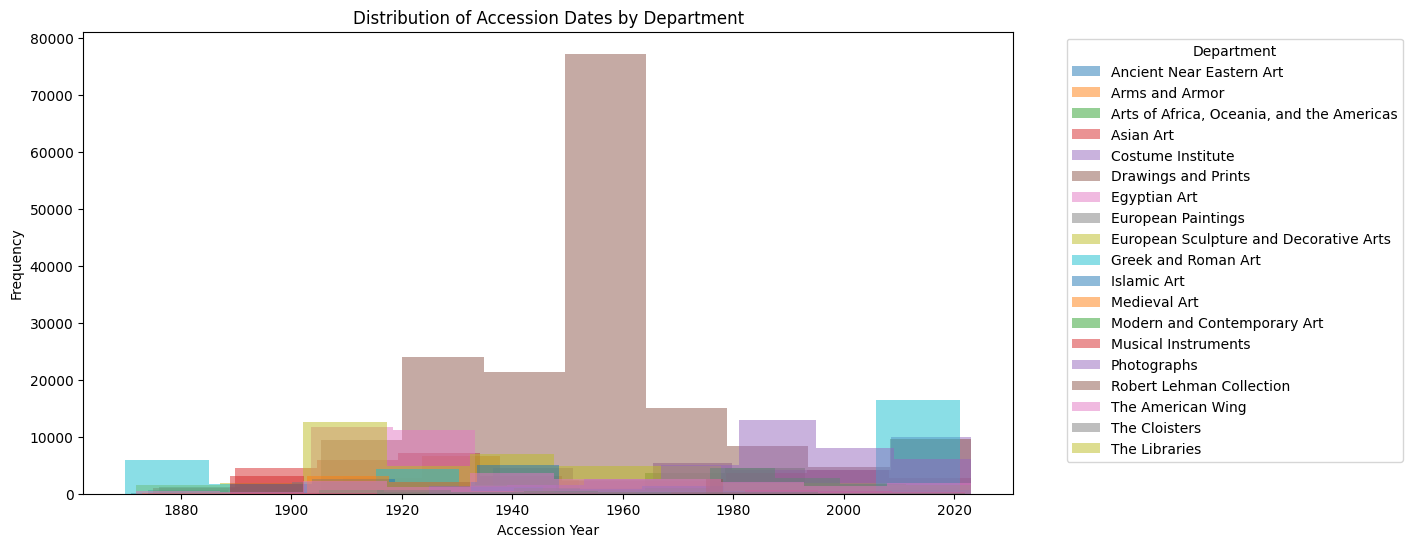

In [4]:
# Create a Figure
plt.figure(figsize=(12, 6))

# Group and Plot Data
cleaned_data.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Accession Dates by Department')
plt.xlabel('Accession Year')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Plotting the Distribution of Object Begin Dates by Department

To visualize the distribution of object begin dates across different departments.

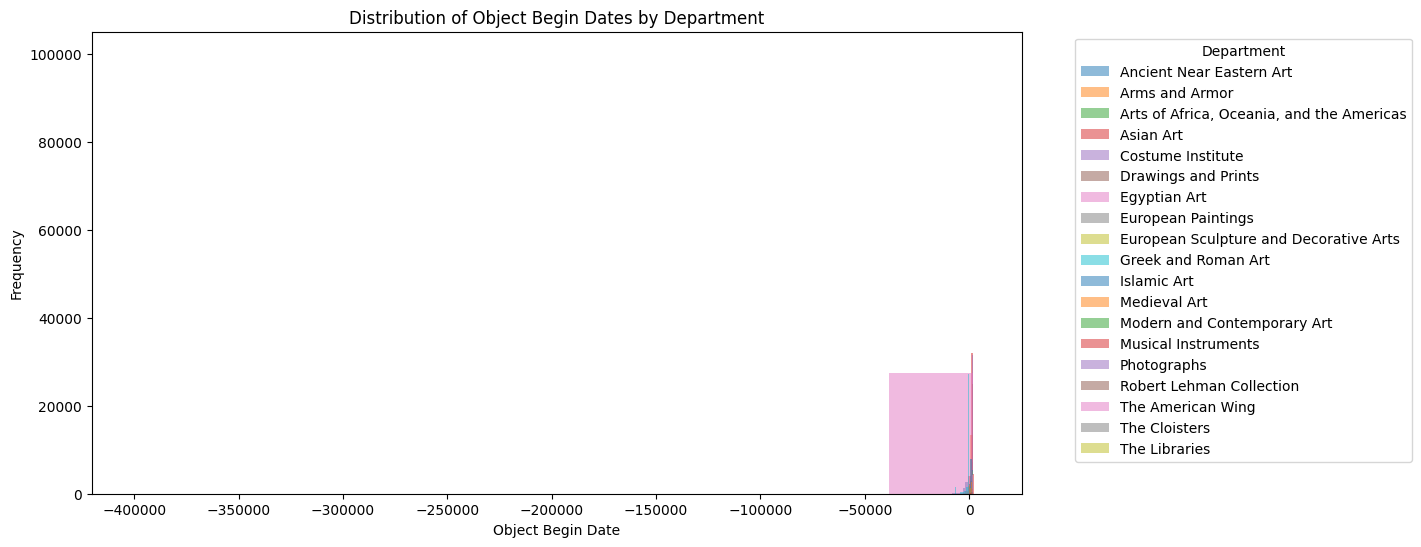

In [5]:
# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object Begin Dates by Department')
plt.xlabel('Object Begin Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Plotting the Distribution of Object End Dates by Department

To visualize the distribution of object end dates across different departments.

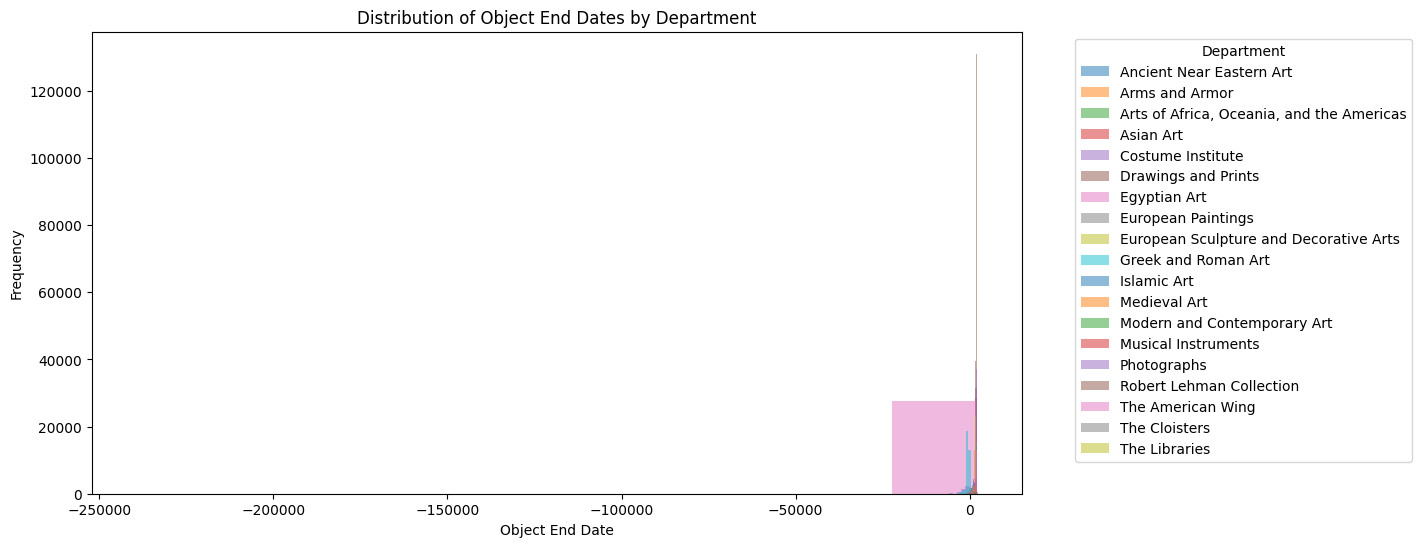

In [6]:
# Plot the distribution of object end dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object End Dates by Department')
plt.xlabel('Object End Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Extracting and Integrating Artist Information

To extract and integrate artist information, including artist dates and dimensions of the art objects, we can use the following steps:

In [7]:
# Optionally: Extract and integrate artist information such as artist dates and dimensions of the art objects
artist_info = cleaned_data[['Artist Begin Date', 'Artist End Date', 'Dimensions']].dropna()

# Display the first few rows of the artist information
artist_info.head()

,Artist Begin Date,Artist End Date,Dimensions
0,1794,1869,Dimensions unavailable
1,1785,1844,Dimensions unavailable
9,1867,1917,Dimensions unavailable
10,1785,1844,Dimensions unavailable
11,1794,1869,Dimensions unavailable


#### Code that shows the rows that are considered anomalies, with the 'Anomaly' column indicating -1 for anomalies.
* Anomalies are data points that significantly differ from the majority of the data. In the context of your dataset, anomalies might be identified due to unusual or unexpected values in one or more features. 
    * Here are some possible reasons why certain rows were flagged as anomalies:
        * Extreme Values: 
            * Data points with values that are extremely high or low compared to the rest of the dataset. For example, an 'Object Date' far outside the typical range.

        * Inconsistent Data: 
            * Rows with inconsistent or contradictory information. For instance, an 'Object Begin Date' that is later than the 'Object End Date'.
        * Rare Combinations: 
            * Uncommon combinations of features that do not appear frequently in the dataset. For example, a specific 'Department' with unusual 'AccessionYear' values.
        * Missing or Default Values: 
            * Rows that have many missing values or default values (e.g., 0 or NaN) in features that usually contain meaningful data.
* To better understand why specific rows were flagged as anomalies, we can examine the values in these rows and compare them to the rest of the dataset. This can help identify patterns or characteristics that make these rows stand out.

In [8]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import re

# Clean 'Object Date' column by extracting the first numeric value
cleaned_data['Object Date'] = cleaned_data['Object Date'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None)

# Convert 'Object Date' to numeric, coercing errors to NaN
cleaned_data.loc[:, 'Object Date'] = pd.to_numeric(cleaned_data['Object Date'], errors='coerce')

# Drop rows with NaN values in 'Object Date'
cleaned_data = cleaned_data.dropna(subset=['Object Date'])

# Save version pre one hot encoding
cleaned_data_no_one=cleaned_data

# Convert categorical data to numerical data using one-hot encoding
cleaned_data = pd.get_dummies(cleaned_data, columns=['Department'])

# Fill NaN values with 0 for simplicity
cleaned_data = cleaned_data.fillna(0)

# Ensure all columns are numeric
for column in cleaned_data.columns:
    cleaned_data[column] = pd.to_numeric(cleaned_data[column], errors='coerce')

# Drop rows with any remaining NaN values
cleaned_data = cleaned_data.dropna()

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to the data
model.fit(cleaned_data)

# Predict anomalies (1 for normal, -1 for anomaly)
anomalies = model.predict(cleaned_data)

# Add the anomaly column to the DataFrame
cleaned_data['Anomaly'] = anomalies

# Display the rows that are considered anomalies
anomalies_df = cleaned_data[cleaned_data['Anomaly'] == -1]

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/3025859297.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data = cleaned_data.fillna(0)


## Counting and Printing the Number of Anomalies

To count and print the number of anomalies detected by the Isolation Forest model, we can use the following steps:

In [9]:
# Count the number of anomalies
anomaly_count = cleaned_data['Anomaly'].value_counts()

# Print the count of anomalies
print(anomaly_count)

Anomaly
 1    56472
-1      551
Name: count, dtype: int64


## Plotting the Count of Anomalies

To visualize the count of anomalies detected by the Isolation Forest model, we can use the following steps:

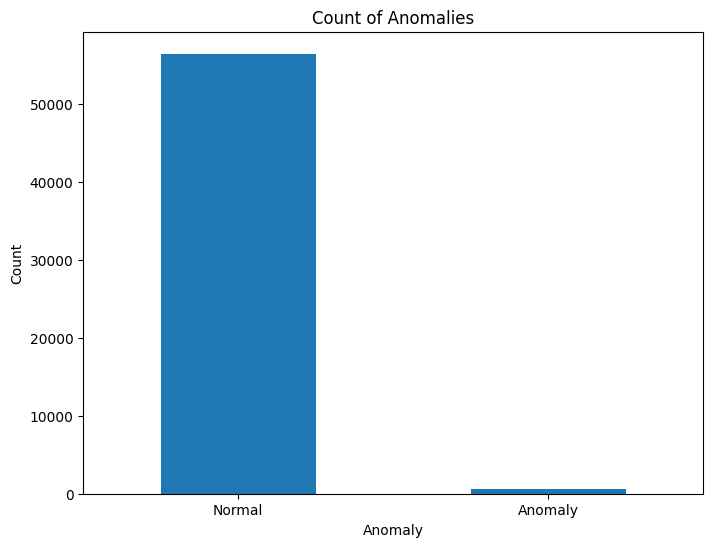

In [10]:
# Plot the count of anomalies
plt.figure(figsize=(8, 6))
anomaly_count.plot(kind='bar')

# Add Titles and Labels
plt.title('Count of Anomalies')
plt.xlabel('Anomaly')
plt.ylabel('Count')

# Customize X-axis Labels
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'], rotation=0)

# Display the Plot
plt.show()

## Plotting Anomalies in a Scatter Plot with Different Colors

To visualize anomalies in a scatter plot with different colors, we can use the following steps:

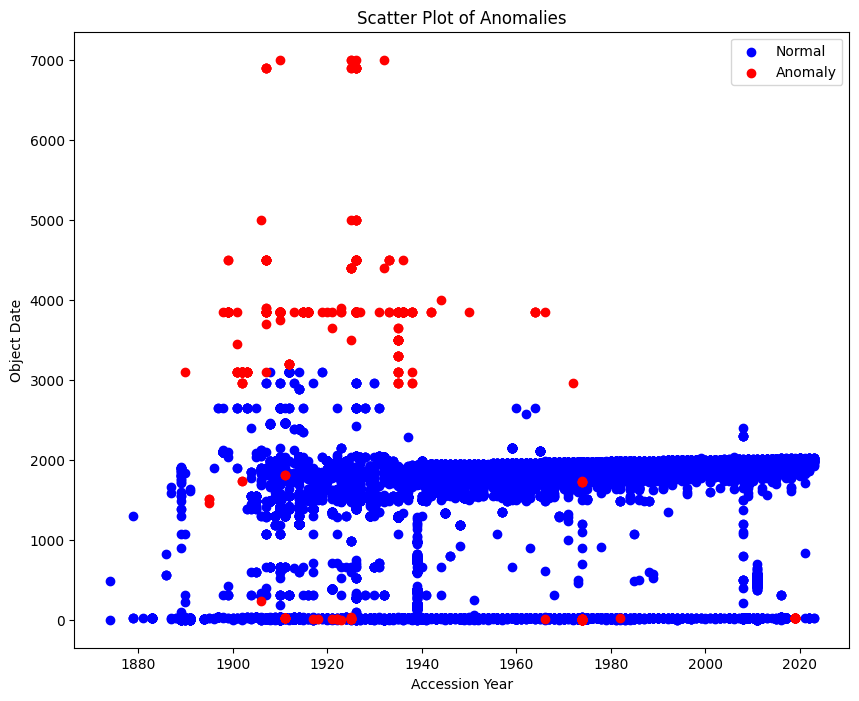

In [11]:
# Plot anomalies in a scatter plot with different colors
plt.figure(figsize=(10, 8))

# Plot normal data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == 1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == 1]['Object Date'],
            c='blue', label='Normal')

# Plot anomalous data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == -1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == -1]['Object Date'],
            c='red', label='Anomaly')

plt.title('Scatter Plot of Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Date')
plt.legend()
plt.show()

# Removing Anomalies and Plotting the New Graph

This script removes anomalies from the dataset and plots a scatter plot without these anomalies. The following steps outline the process:

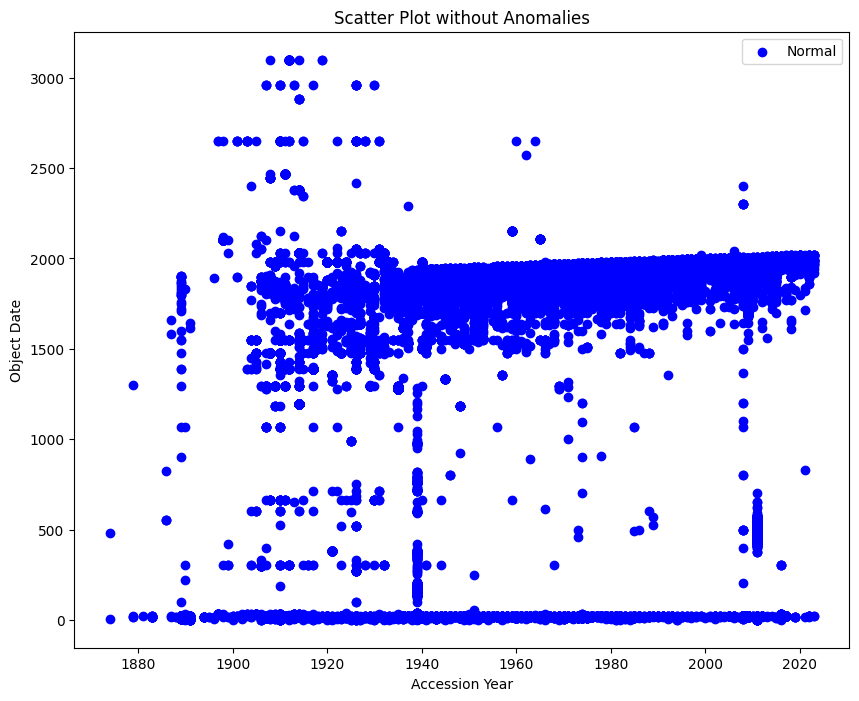

In [12]:
# Remove anomalies from the dataset
cleaned_data_no_anomalies = cleaned_data[cleaned_data['Anomaly'] == 1]

# Plot the new graph without anomalies
plt.figure(figsize=(10, 8))

# Plot normal data points without anomalies
plt.scatter(cleaned_data_no_anomalies['AccessionYear'],
            cleaned_data_no_anomalies['Object Date'],
            c='blue', label='Normal')

plt.title('Scatter Plot without Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Date')
plt.legend()
plt.show()

# Reversing One-Hot Encoding for the 'Department' Column

This script reverses the one-hot encoding for the 'Department' column and drops the one-hot encoded columns. The following steps outline the process:

In [13]:
# Identify one-hot encoded columns
department_columns = [col for col in cleaned_data_no_anomalies.columns if col.startswith('Department_')]

# Check if department_columns is not empty
if department_columns:
    # Reverse one-hot encoding for the 'Department' column
    cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies[department_columns].idxmax(axis=1)
    cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies['Department'].apply(lambda x: x.split('_')[1])

    # Drop the one-hot encoded columns
    cleaned_data_no_anomalies = cleaned_data_no_anomalies.drop(columns=department_columns)
else:
    print("No one-hot encoded columns found for 'Department_'")

print(cleaned_data_no_anomalies.head())

       AccessionYear  Object Begin Date  Object End Date  Artist Begin Date  \
1491          1962.0               1722             1790                0.0   
1795          1934.0               1810             1820                0.0   
6894          1941.0               1782             1785             1765.0   
13294         1941.0               1872             1900                0.0   
14906         1997.0               1854             1857             1854.0   

       Artist End Date  Dimensions  Object Date  Anomaly         Department  
1491               0.0         0.0       1725.0        1  The American Wing  
1795               0.0         0.0       1810.0        1  The American Wing  
6894            1830.0         0.0       1785.0        1  The American Wing  
13294              0.0         0.0       1875.0        1  The American Wing  
14906           1857.0         0.0       1854.0        1  The American Wing  


/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/2358767338.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies[department_columns].idxmax(axis=1)


## Plotting Object Start Dates by Department with Color Indicating Accession Year

To visualize object start dates by department, with color indicating the accession year, we can use the following steps:

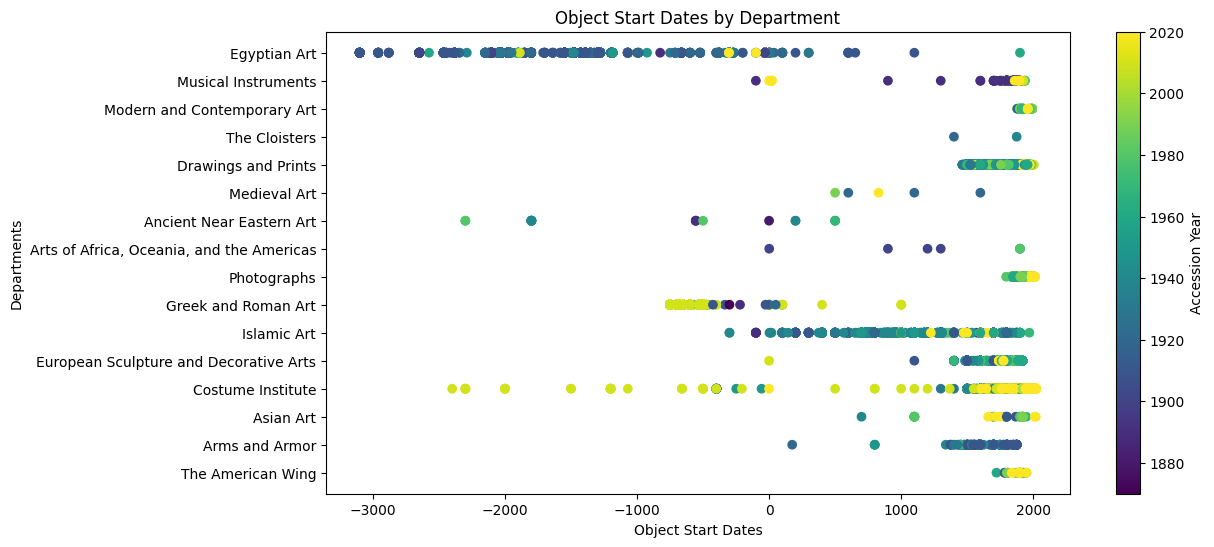

In [14]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a scatter plot
# X-axis: Object Begin Date
# Y-axis: Department
# Color: Accession Year (rounded to the nearest decade)
# Colormap: viridis
plt.scatter(cleaned_data_no_anomalies['Object Begin Date'], cleaned_data_no_anomalies['Department'],
            c=round(cleaned_data_no_anomalies['AccessionYear'], -1), cmap='viridis')

# Add a colorbar to the plot
cbar = plt.colorbar()
cbar.set_label('Accession Year')  # Label for the colorbar

# Add a title to the plot
plt.title('Object Start Dates by Department')

# Label the Y-axis
plt.ylabel('Departments')

# Label the X-axis
plt.xlabel('Object Start Dates')

# Display the plot
plt.show()

# Converting 'AccessionYear' to Numeric and Plotting Distribution by Department

This script converts the 'AccessionYear' column to numeric, handles any errors by coercing them to NaN, drops rows with NaN values, and plots the distribution of accession dates by department. The following steps outline the process:

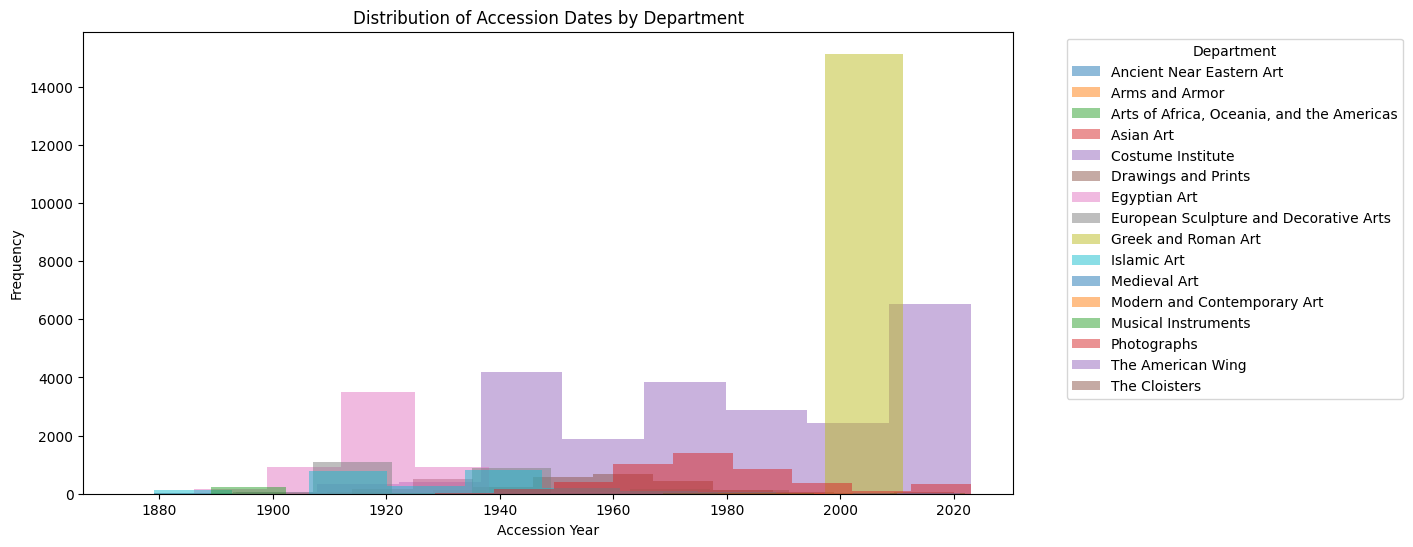

In [15]:
# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data_no_anomalies.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data_no_anomalies['AccessionYear'], errors='coerce')

# Drop rows with NaN values in 'AccessionYear'
cleaned_data_no_anomalies = cleaned_data_no_anomalies.dropna(subset=['AccessionYear'])

# Plot the distribution of accession dates by department
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'AccessionYear'
cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Accession Dates by Department')

# Label the X-axis
plt.xlabel('Accession Year')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department'
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Plotting the Distribution of Object Dates by Department

This script plots the distribution of object begin and end dates by department. The following steps outline the process:

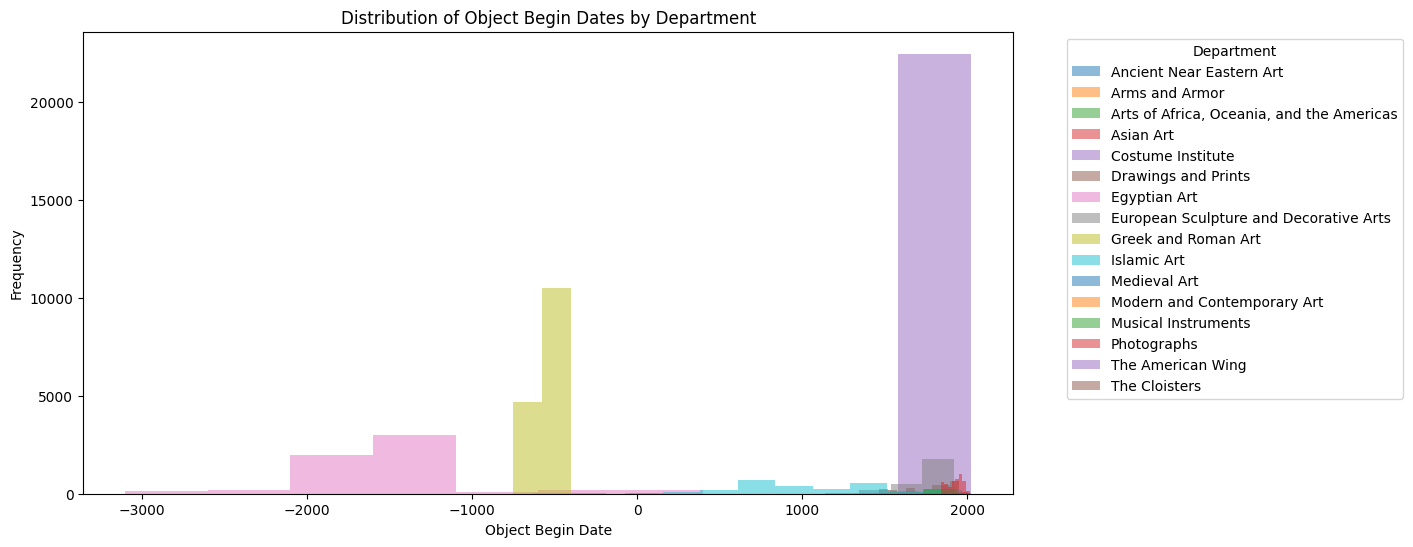

In [16]:
# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'Object Begin Date'
cleaned_data_no_anomalies.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Object Begin Dates by Department')

# Label the X-axis
plt.xlabel('Object Begin Date')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Plotting the Distribution of Object End Dates by Department

This script plots the distribution of object end dates by department. The following steps outline the process:

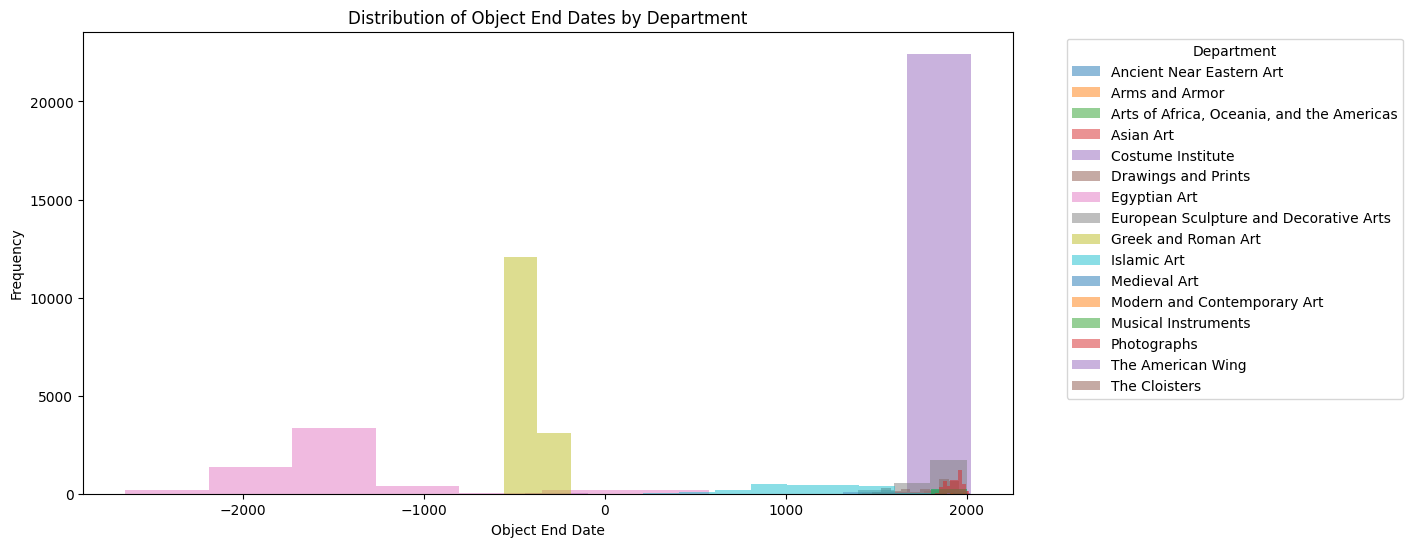

In [17]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'Object End Date'
cleaned_data_no_anomalies.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Object End Dates by Department')

# Label the X-axis
plt.xlabel('Object End Date')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Scatter Plot for Object Begin Date vs Accession Year by Department

This script creates a scatter plot to visualize the relationship between object begin dates and accession years, grouped by department. The following steps outline the process:

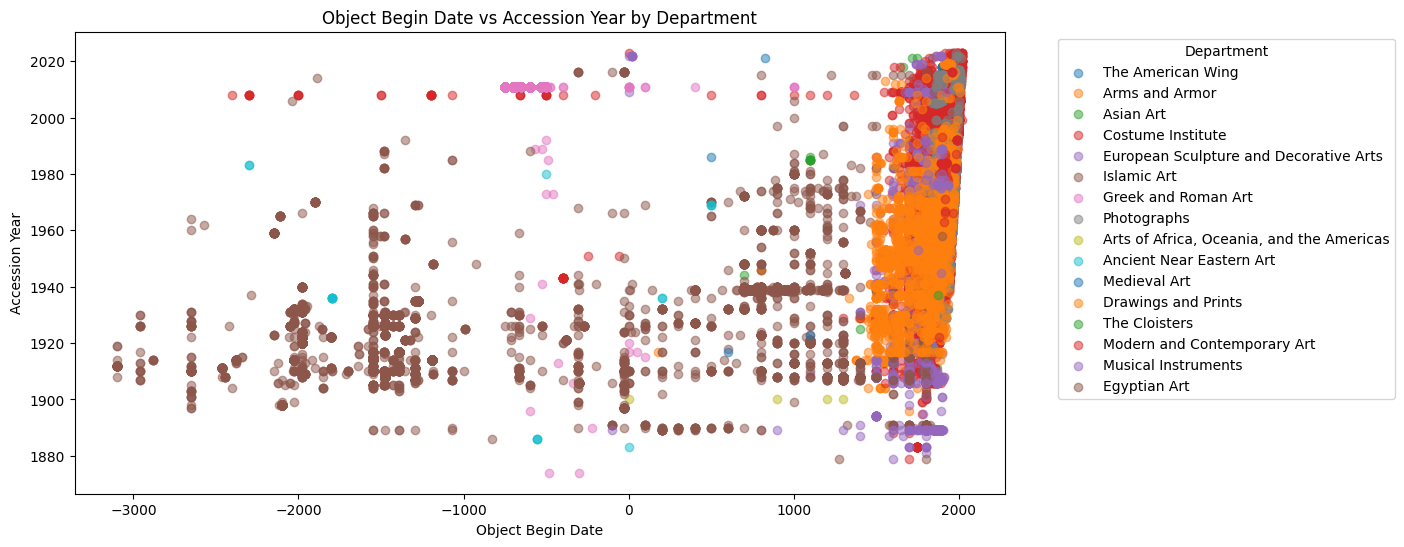

In [18]:
# Scatter plot for Object Begin Date vs Accession Year by Department

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Loop through each unique department and create a scatter plot
for department in cleaned_data_no_anomalies['Department'].unique():
    # Filter the data for the current department
    dept_data = cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department'] == department]
    # Create a scatter plot for the current department
    plt.scatter(dept_data['Object Begin Date'], dept_data['AccessionYear'], label=department, alpha=0.5)

# Add a title to the plot
plt.title('Object Begin Date vs Accession Year by Department')

# Label the X-axis
plt.xlabel('Object Begin Date')

# Label the Y-axis
plt.ylabel('Accession Year')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

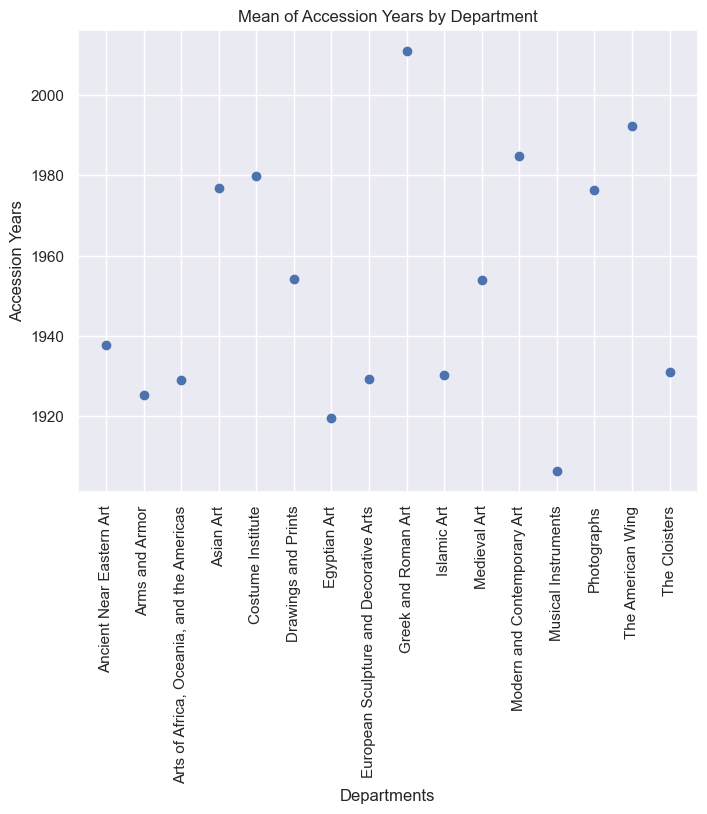

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/2859279470.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['Object Begin Date'],palette=sns.color_palette("bright"))
/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/2859279470.py:12: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['Object Begin Date'],palette=sns.color_palette("bright"))


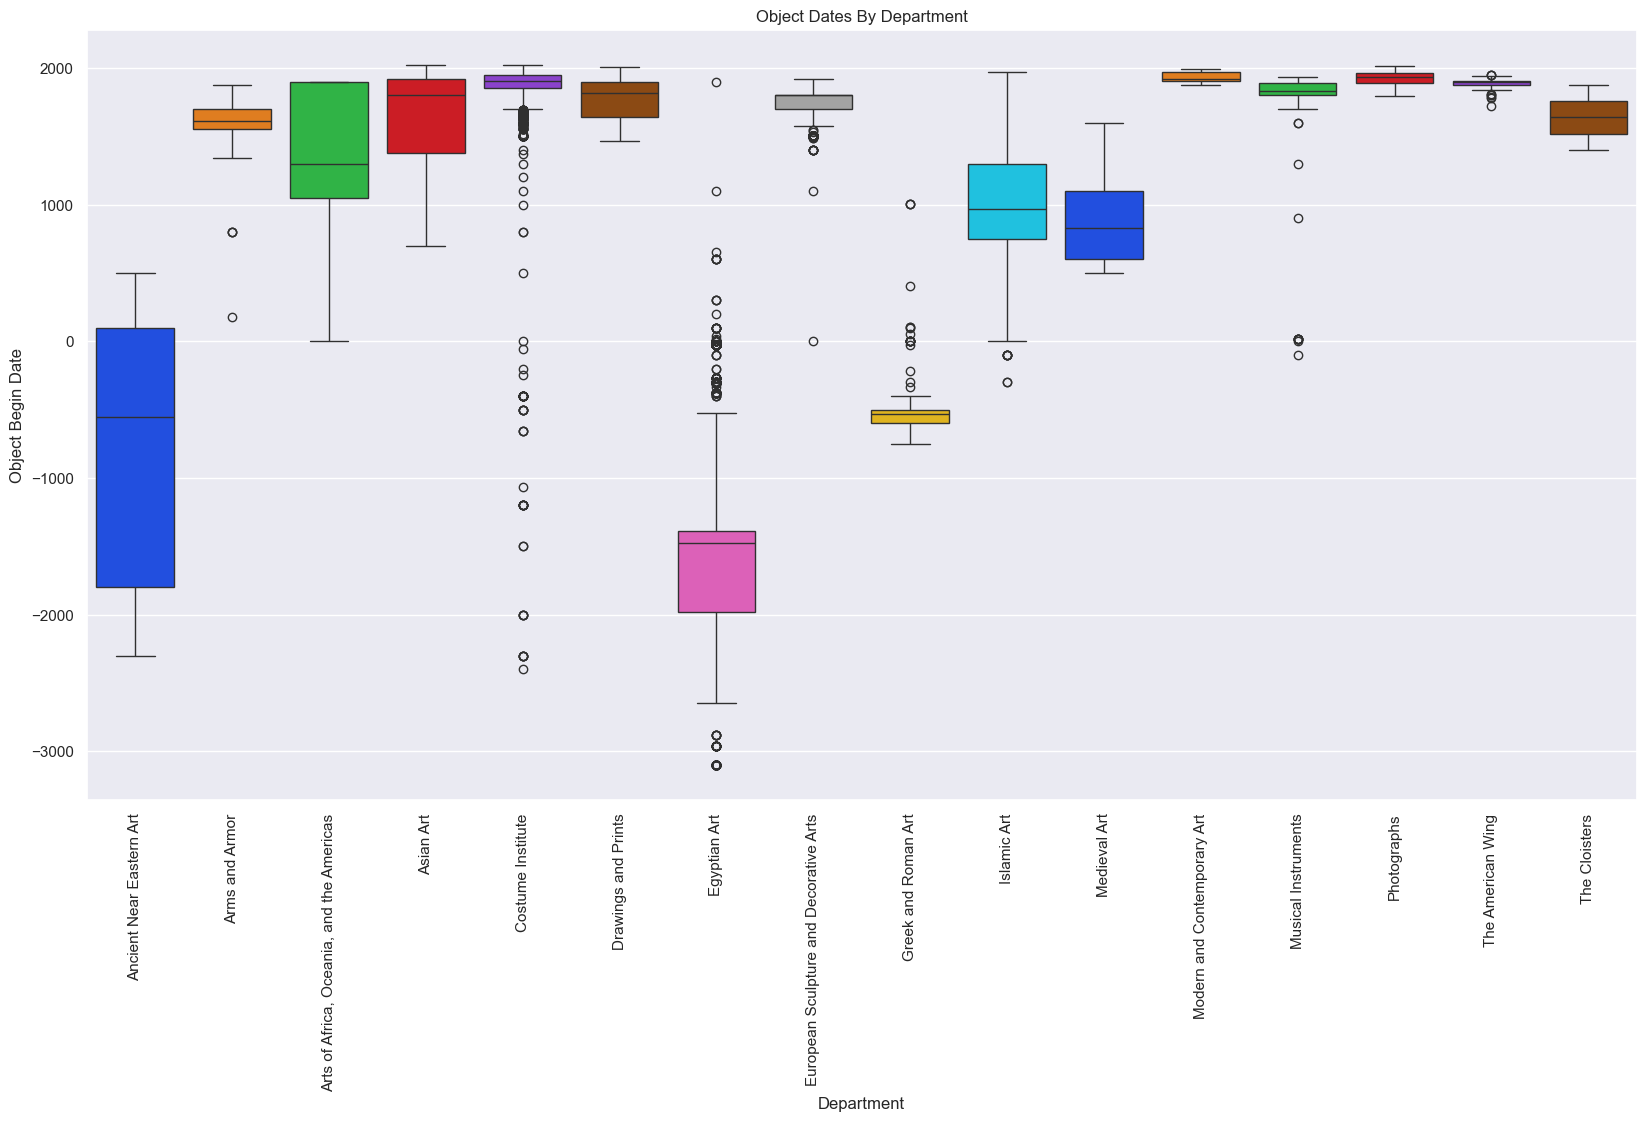

In [51]:
#Plot of Means of Accession Date By Department
acces_means=cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].mean()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(acces_means.index, acces_means.values)
plt.title('Mean of Accession Years by Department')
plt.xlabel('Departments')
plt.ylabel('Accession Years')
plt.xticks(rotation=90)
plt.show()

#Boxplot of Object Dates by Deparmtent
sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['Object Begin Date'],palette=sns.color_palette("bright"))
sns.set_theme(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.title("Object Dates By Department")
plt.show()

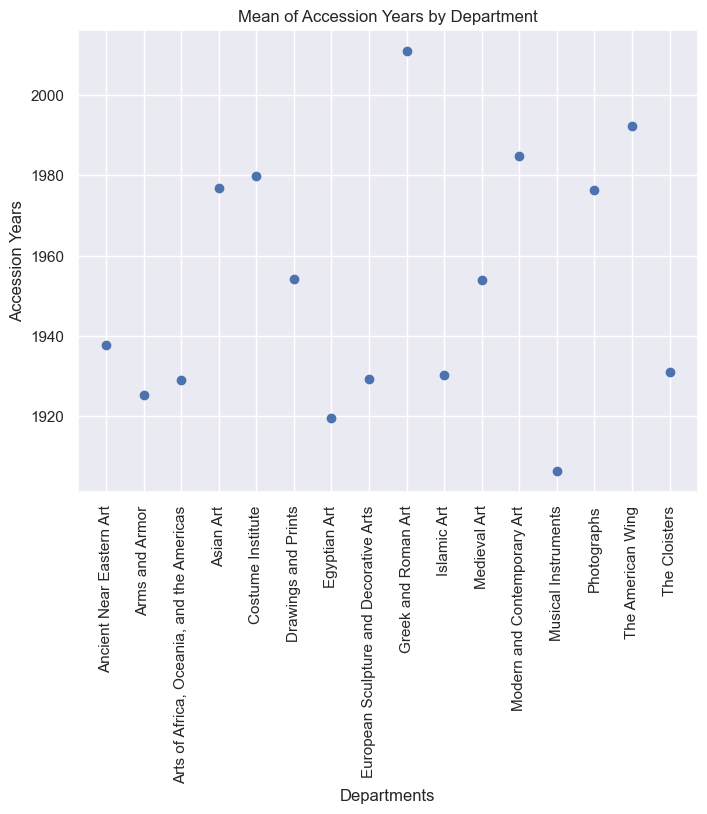

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/2931010973.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['AccessionYear'],palette=sns.color_palette("bright"))
/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/2931010973.py:12: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['AccessionYear'],palette=sns.color_palette("bright"))


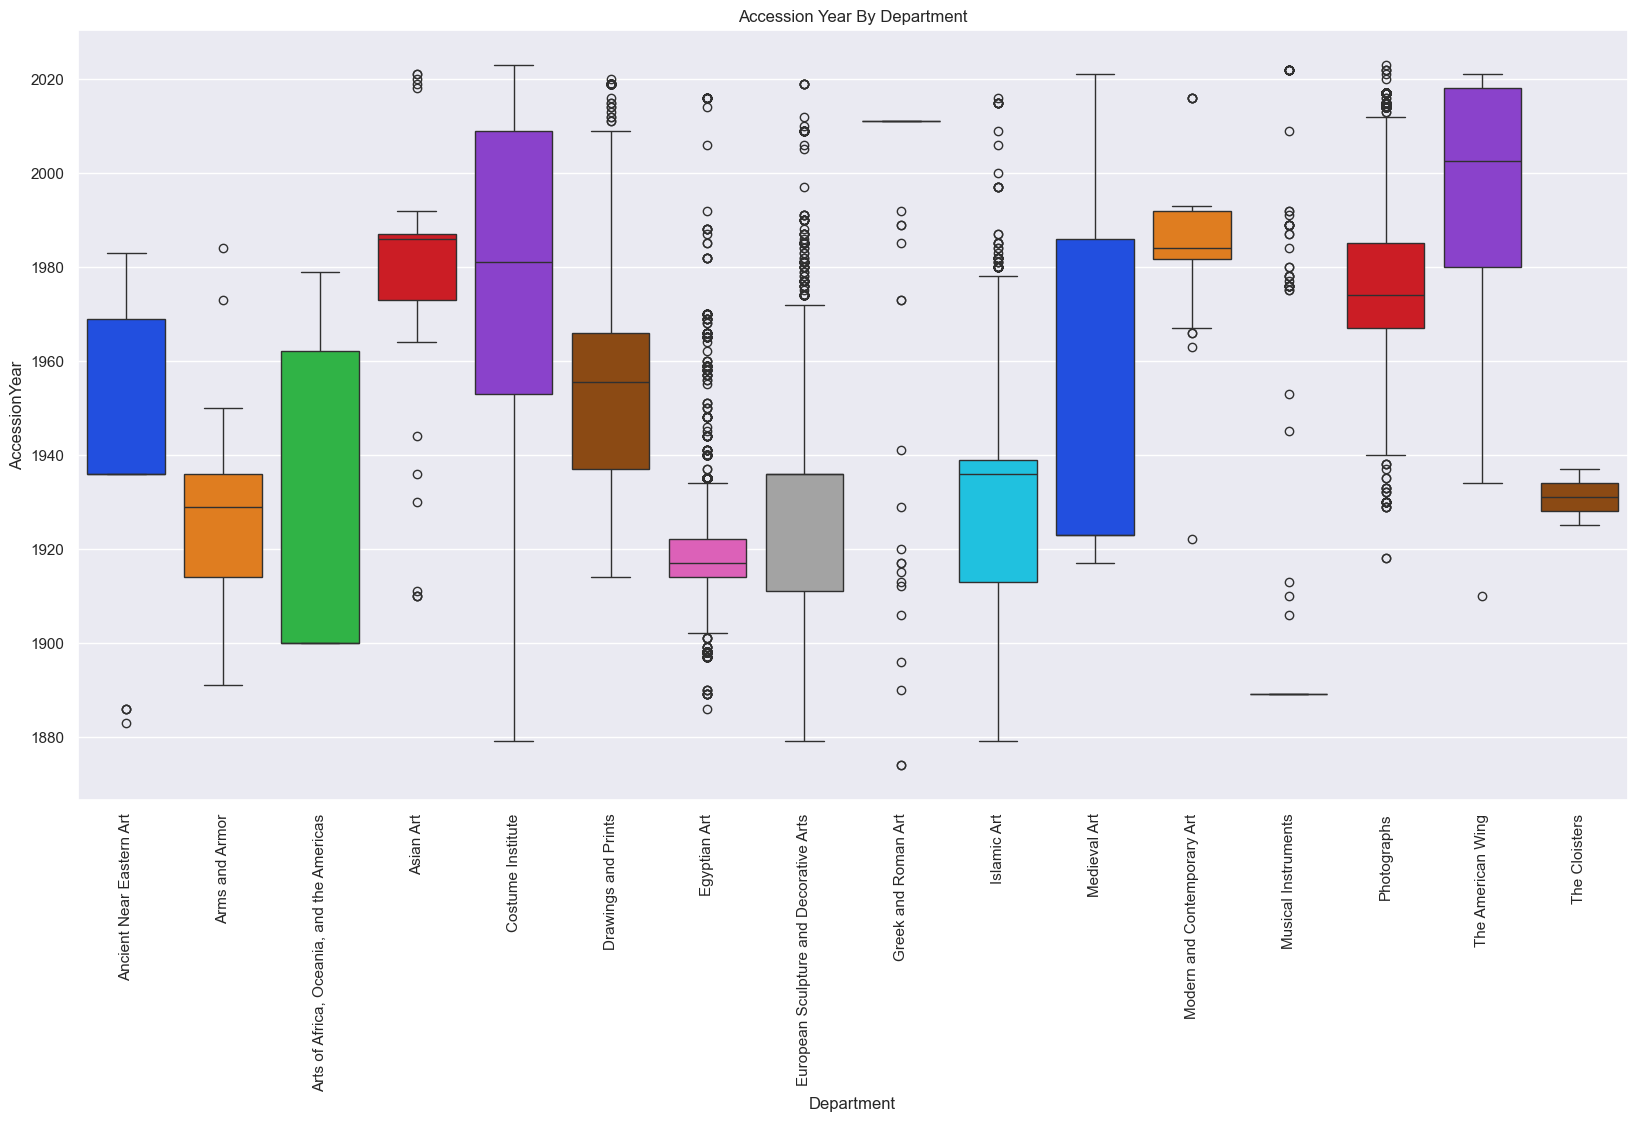

In [52]:
#Plot of Means of Accession Date By Department
acces_means=cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].mean()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(acces_means.index, acces_means.values)
plt.title('Mean of Accession Years by Department')
plt.xlabel('Departments')
plt.ylabel('Accession Years')
plt.xticks(rotation=90)
plt.show()

#Boxplot of Accession Date By Department
sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['AccessionYear'],palette=sns.color_palette("bright"))
sns.set_theme(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.title("Accession Year By Department")
plt.show()

In [53]:
# By year, which department is most represented
mcv_osd = cleaned_data_no_anomalies.groupby('Object Begin Date')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')
print(mcv_osd)

Object Begin Date
-3100         Egyptian Art
-2960         Egyptian Art
-2880         Egyptian Art
-2650         Egyptian Art
-2649         Egyptian Art
               ...        
 2018    Costume Institute
 2019    Costume Institute
 2020    Costume Institute
 2021    Costume Institute
 2022    Costume Institute
Name: Most Common Value, Length: 756, dtype: object


In [54]:
# What did the Met focus on each year
mcv_acc = cleaned_data_no_anomalies.groupby('AccessionYear')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')
print(mcv_acc)


AccessionYear
1874.0                       Greek and Roman Art
1879.0                               Islamic Art
1881.0    European Sculpture and Decorative Arts
1883.0                         Costume Institute
1886.0                  Ancient Near Eastern Art
                           ...                  
2019.0                       Drawings and Prints
2020.0                         Costume Institute
2021.0                         Costume Institute
2022.0                         Costume Institute
2023.0                         Costume Institute
Name: Most Common Value, Length: 140, dtype: object


In [41]:
#Modeling Imports
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn import tree
import numpy as np

In [42]:
#Splits With Old Data
X_old = cleaned_data_no_one.drop(['Department','Dimensions','Artist Begin Date','Artist End Date'],axis=1)
cleaned_data_no_one=cleaned_data_no_one.sort_values(by='Department')
y_old = cleaned_data_no_one.Department
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, test_size=0.3, random_state=1)

#Splits With Cleaned Data
X = cleaned_data_no_anomalies.drop(['Department','Dimensions','Artist Begin Date','Artist End Date'],axis=1)
cleaned_data_no_anomalies = cleaned_data_no_anomalies.sort_values(by='Department')
y = cleaned_data_no_anomalies.Department
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
#Decision Old Data
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_old,y_train_old)
y_pred_old = clf.predict(X_test_old)

#Decision Tree New Data
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [44]:
# Decision Tree Accuracy
print("Old Data Accuracy:",metrics.accuracy_score(y_test_old, y_pred_old))
print("Cleaned Accuracy:",metrics.accuracy_score(y_test, y_pred))

Old Data Accuracy: 0.8528960573476703
Cleaned Accuracy: 0.934777476094912


/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_71354/3905082599.py:4: RuntimeWarning: invalid value encountered in divide
  matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]


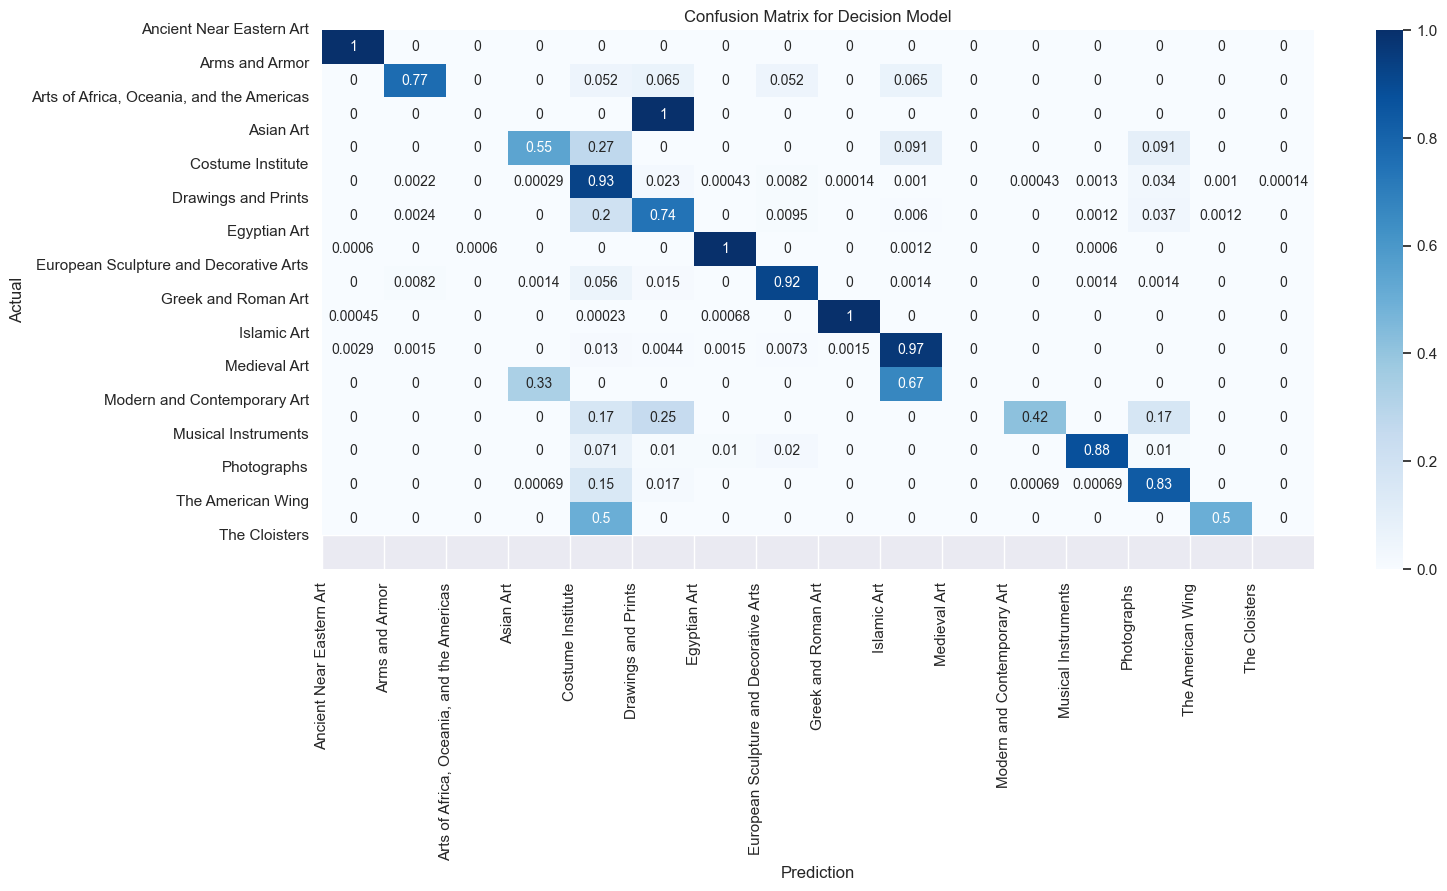

In [45]:
#Plotting Confusion Matrix
labels = unique_labels(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred,labels=labels)
matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues)


tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels, rotation=0)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Model')
plt.show()

In [46]:
#Classifciation Report
class_report = classification_report(y_test, y_pred,zero_division=0)
print("Classification Report:")
print(class_report)

Classification Report:
                                           precision    recall  f1-score   support

                 Ancient Near Eastern Art       0.50      1.00      0.67         5
                           Arms and Armor       0.71      0.77      0.74        77
Arts of Africa, Oceania, and the Americas       0.00      0.00      0.00         1
                                Asian Art       0.55      0.55      0.55        11
                        Costume Institute       0.93      0.93      0.93      6932
                      Drawings and Prints       0.75      0.74      0.75       839
                             Egyptian Art       1.00      1.00      1.00      1659
   European Sculpture and Decorative Arts       0.90      0.92      0.91       732
                      Greek and Roman Art       1.00      1.00      1.00      4437
                              Islamic Art       0.97      0.97      0.97       688
                             Medieval Art       0.00      0.00 

In [47]:
#Random Forest Old Data
rf = RandomForestClassifier()
rf = rf.fit(X_train_old,y_train_old)
y_pred_old = rf.predict(X_test_old)

#Random Forest New Data
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [48]:
# Decision Tree Accuracy
print("Old Data Accuracy:",metrics.accuracy_score(y_test_old, y_pred_old))
print("Cleaned Accuracy:",metrics.accuracy_score(y_test, y_pred))

Old Data Accuracy: 0.8649605734767025
Cleaned Accuracy: 0.9454019596269626


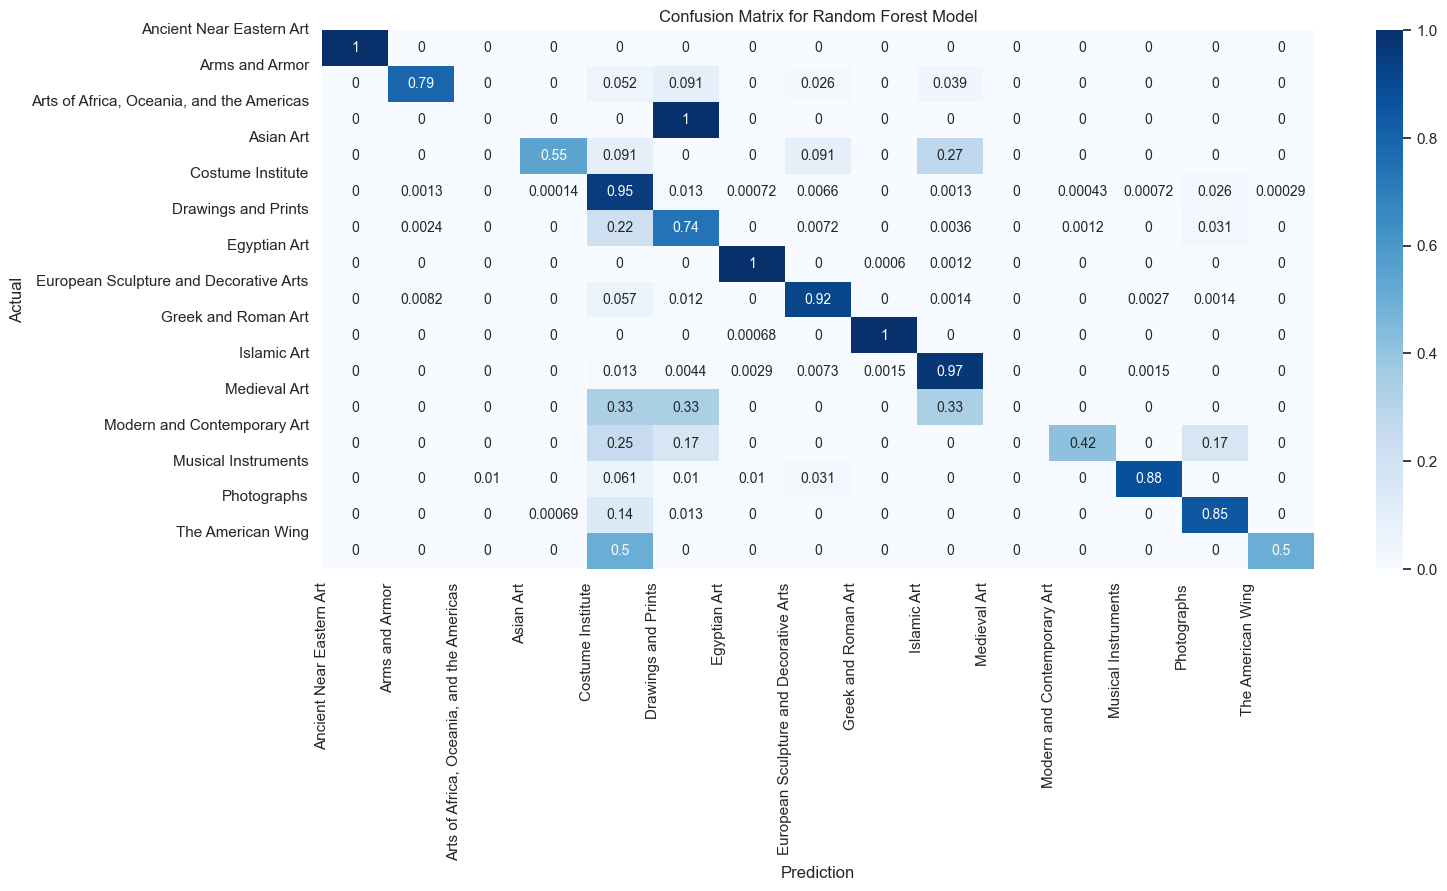

In [49]:
#Plotting Confusion Matrix
labels = unique_labels(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred,labels=labels)
matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues)

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels, rotation=0)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [50]:
#Classification Report
class_report = classification_report(y_test, y_pred,zero_division=0)
print("Classification Report:")
print(class_report)

Classification Report:
                                           precision    recall  f1-score   support

                 Ancient Near Eastern Art       1.00      1.00      1.00         5
                           Arms and Armor       0.78      0.79      0.79        77
Arts of Africa, Oceania, and the Americas       0.00      0.00      0.00         1
                                Asian Art       0.75      0.55      0.63        11
                        Costume Institute       0.94      0.95      0.94      6932
                      Drawings and Prints       0.82      0.74      0.78       839
                             Egyptian Art       0.99      1.00      1.00      1659
   European Sculpture and Decorative Arts       0.91      0.92      0.92       732
                      Greek and Roman Art       1.00      1.00      1.00      4437
                              Islamic Art       0.97      0.97      0.97       688
                             Medieval Art       0.00      0.00 